Topic 9: Sorting Algorithms

Task 1: Implementing and Analyzing Sorting Algorithms

Bubble Sort:

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr


Selection Sort:

In [2]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


Insertion Sort:

In [3]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr


Step 2: Sorting Function for Comparison

In [4]:
import time

def measure_time(sort_function, arr):
    start = time.time()
    sort_function(arr.copy())  # using arr.copy() to avoid sorting the same list twice
    end = time.time()
    return end - start


Step 3: Measure Execution Time for Different List Sizes

In [5]:
import random

def compare_sorting_algorithms():
    sizes = [100, 500, 1000, 2000, 5000]  # Different list sizes
    bubble_times = []
    selection_times = []
    insertion_times = []

    for size in sizes:
        arr = random.sample(range(1, 10001), size)  # Generate a random list of unique integers
        bubble_times.append(measure_time(bubble_sort, arr))
        selection_times.append(measure_time(selection_sort, arr))
        insertion_times.append(measure_time(insertion_sort, arr))

    return sizes, bubble_times, selection_times, insertion_times


Step 4: Plot the Performance Comparison

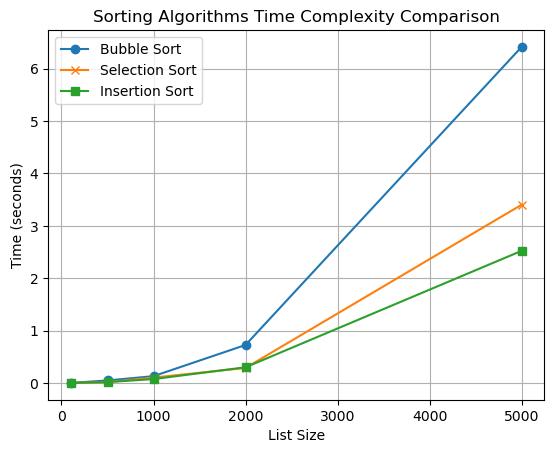

In [6]:
import matplotlib.pyplot as plt

def plot_comparison(sizes, bubble_times, selection_times, insertion_times):
    plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o')
    plt.plot(sizes, selection_times, label="Selection Sort", marker='x')
    plt.plot(sizes, insertion_times, label="Insertion Sort", marker='s')
    
    plt.xlabel('List Size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithms Time Complexity Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Running the comparison and plotting the results
sizes, bubble_times, selection_times, insertion_times = compare_sorting_algorithms()
plot_comparison(sizes, bubble_times, selection_times, insertion_times)


In [7]:
arr = [64, 25, 12, 22, 11]
print("Bubble Sort:", bubble_sort(arr))  # Output: [11, 12, 22, 25, 64]
print("Selection Sort:", selection_sort(arr))  # Output: [11, 12, 22, 25, 64]
print("Insertion Sort:", insertion_sort(arr))  # Output: [11, 12, 22, 25, 64]


Bubble Sort: [11, 12, 22, 25, 64]
Selection Sort: [11, 12, 22, 25, 64]
Insertion Sort: [11, 12, 22, 25, 64]


Task 2: Implementing Quick Sort and Merge Sort with Performance
Comparison

Quick Sort:

In [8]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]  # Choosing the middle element as pivot
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


Merge Sort:

In [9]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result


Step 2: Sorting Function to Compare Both Algorithms

In [10]:
import time

def measure_time(sort_function, arr):
    start = time.time()
    sort_function(arr.copy())  # Avoid modifying the original list
    end = time.time()
    return end - start


Step 3: Performance Comparison with Different Input Sizes

In [11]:
import random

def compare_sorting_algorithms():
    sizes = [1000, 5000, 10000]  # Different list sizes for performance testing
    quick_times = []
    merge_times = []

    for size in sizes:
        arr = random.sample(range(1, 10001), size)  # Generate a random list of unique integers
        quick_times.append(measure_time(quick_sort, arr))
        merge_times.append(measure_time(merge_sort, arr))

    return sizes, quick_times, merge_times


Step 4: Plotting the Performance Comparison

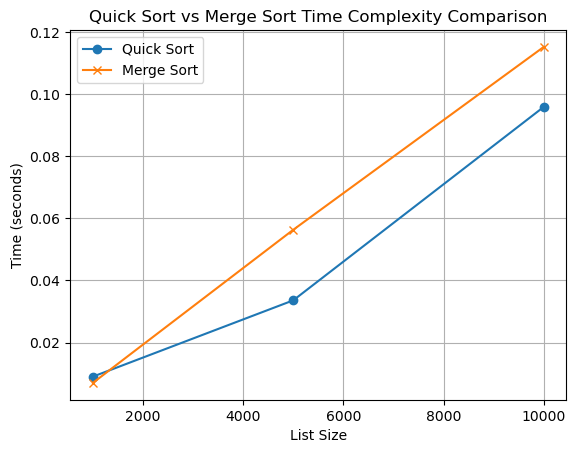

In [12]:
import matplotlib.pyplot as plt

def plot_comparison(sizes, quick_times, merge_times):
    plt.plot(sizes, quick_times, label="Quick Sort", marker='o')
    plt.plot(sizes, merge_times, label="Merge Sort", marker='x')
    
    plt.xlabel('List Size')
    plt.ylabel('Time (seconds)')
    plt.title('Quick Sort vs Merge Sort Time Complexity Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Running the comparison and plotting the results
sizes, quick_times, merge_times = compare_sorting_algorithms()
plot_comparison(sizes, quick_times, merge_times)


In [13]:
arr = [38, 27, 43, 3, 9, 82, 10]
print("Quick Sort:", quick_sort(arr))  # Output: [3, 9, 10, 27, 38, 43, 82]
print("Merge Sort:", merge_sort(arr))  # Output: [3, 9, 10, 27, 38, 43, 82]


Quick Sort: [3, 9, 10, 27, 38, 43, 82]
Merge Sort: [3, 9, 10, 27, 38, 43, 82]


Task 3: Implementing Heap Sort and Counting Sort for Large Datasets

Step 1: Implement Heap Sort (using Binary Heap)

In [14]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    
    # Check if left child exists and is greater than the root
    if left < n and arr[left] > arr[largest]:
        largest = left
    
    # Check if right child exists and is greater than the root
    if right < n and arr[right] > arr[largest]:
        largest = right
    
    # If largest is not the root, swap and heapify the affected subtree
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    
    # Build a max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    
    # One by one extract elements from the heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        heapify(arr, i, 0)  # Heapify the root element
    return arr


In [ ]:
Step 2: Implement Counting Sort

In [15]:
def counting_sort(arr):
    if len(arr) == 0:
        return arr
    
    # Find the maximum and minimum elements in the array
    max_val = max(arr)
    min_val = min(arr)
    
    # Create a count array with a range of the numbers in the input
    range_of_elements = max_val - min_val + 1
    count = [0] * range_of_elements
    output = [0] * len(arr)
    
    # Store count of each number
    for num in arr:
        count[num - min_val] += 1
    
    # Modify count[i] so that it contains the actual position of the number in the output array
    for i in range(1, range_of_elements):
        count[i] += count[i - 1]
    
    # Build the output array by placing elements in the correct position
    for num in reversed(arr):
        output[count[num - min_val] - 1] = num
        count[num - min_val] -= 1
    
    return output


Step 3: Performance Comparison with Different Datasets

In [16]:
import time

def measure_time(sort_function, arr):
    start = time.time()
    sort_function(arr.copy())  # Avoid modifying the original list
    end = time.time()
    return end - start


In [17]:
import random

def compare_sorting_algorithms():
    sizes = [1000, 5000, 10000, 20000]  # Different list sizes for performance testing
    heap_times = []
    counting_times = []
    
    for size in sizes:
        # Generate random list for testing
        arr = random.choices(range(1, 10001), k=size)  # Generate random numbers between 1 and 10000
        heap_times.append(measure_time(heap_sort, arr))
        
        # For counting sort, let's ensure the range is smaller, as it works best with small ranges
        arr_for_counting = random.choices(range(1, 201), k=size)  # Range 1 to 200
        counting_times.append(measure_time(counting_sort, arr_for_counting))
    
    return sizes, heap_times, counting_times


Step 4: Plotting the Performance Comparison

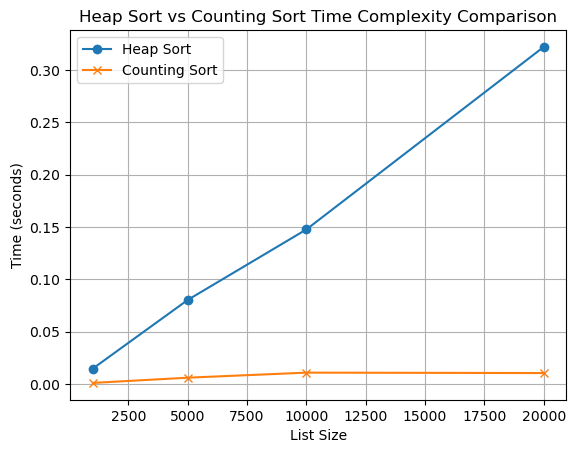

In [18]:
import matplotlib.pyplot as plt

def plot_comparison(sizes, heap_times, counting_times):
    plt.plot(sizes, heap_times, label="Heap Sort", marker='o')
    plt.plot(sizes, counting_times, label="Counting Sort", marker='x')
    
    plt.xlabel('List Size')
    plt.ylabel('Time (seconds)')
    plt.title('Heap Sort vs Counting Sort Time Complexity Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Running the comparison and plotting the results
sizes, heap_times, counting_times = compare_sorting_algorithms()
plot_comparison(sizes, heap_times, counting_times)


In [19]:
arr = [4, 10, 3, 5, 1]
print("Heap Sort:", heap_sort(arr))  # Output: [1, 3, 4, 5, 10]

arr2 = [1, 4, 1, 2, 7, 5, 2]
print("Counting Sort:", counting_sort(arr2))  # Output: [1, 1, 2, 2, 4, 5, 7]


Heap Sort: [1, 3, 4, 5, 10]
Counting Sort: [1, 1, 2, 2, 4, 5, 7]
